# Customer analysis

The intent of this project is to be able to successfully apply classification and clustering on a dataset and be able to analyze and make predictions that are relevant to the goal predefined.

For this project I have chosen a dataset which collects the data that is necessary to analyse a customer behavior when making a purchase within a company, so a *Customer Personality Analysis*.

The link to find the dataset that was used is:
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

## Goals
The goal of this project is to:
1. Predict whether offers are an effective method to have a client buy in the store - We will be doing this by using binary classification of the attribute "Response", since it tells us whether a customer accepted the offer (1) or refused (0) - classify features values in 1 or 0. It is done in this notebook.
2. Segment customers based on their characteristics such as age, income, family situation... -  We will identify distinct customer groups that may have different needs and behaviors by applying clustering techniques. Look at the notebook "Clustering" - We will first segment customers based on all the characteristics given by the dataset and afterwards we will only consider their spending habits and Income to segregate them.

## Attributes
In this dataset the attributes are divided into four different types of categories

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotions**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place of purchase**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

The meaning of the attributes was copied from the presentation of the dataset, this presentation can be found in the link given above.

## Libraries needed for the project
In order to develop this project, these libraries are needed (some of the libraries were not used and just added during the development of the project):

In [1]:
# Basic necessary libraries
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import Counter
from mlxtend.plotting import plot_decision_regions
import mglearn

In [2]:
# For the analysis of the dataset
import pandas as pd
import missingno as msno

# For preprocessing
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder, StandardScaler, KBinsDiscretizer, add_dummy_feature, LabelEncoder, Binarizer
from sklearn.preprocessing import KBinsDiscretizer, add_dummy_feature, LabelEncoder, Binarizer, Normalizer, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For splitting in train and test sets
from sklearn.model_selection import train_test_split

#----------------------------------------------------------------------------------------------------------------------------------------------
# We added all possible methods of libraries to facilitate model selection

# Classifiers - Supervised learning
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree, even if I will probably only use the classification Decision Tree
from sklearn.svm import LinearSVC, SVC # Support Vector Machine
from sklearn.decomposition import PCA # Dimensionality reduction feature extraction

# Classifier - Unsupervised learning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # Dimensionality reduction feature extraction
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # Dimensionality reduction feature selection

# To deal with imbalanced classes
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# Model selection
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.model_selection import cross_val_predict, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_val_score
from random import choice
import itertools
from imblearn.pipeline import Pipeline as IMBPipeline

# Ensemble learning
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBClassifier

# Model performance evaluation
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, roc_curve, get_scorer_names
from sklearn.metrics import precision_score, accuracy_score, recall_score,  precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# For the refinement of the model selection
from scipy.stats import loguniform, beta, uniform


# Corrupting the dataset

To import the dataset we have to use Pandas library, since it allows to visualize the dataset and act upon it.

In [3]:
dataset_marketing = pd.read_csv('marketing_campaign.csv', sep="\t")
dataset_marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Now we check the information about the dataset...

In [4]:
dataset_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

... and the specific number of null values that it has.

In [5]:
dataset_marketing.isnull().sum(axis=0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Checking the information about the dataset we find that it is almost perfectly clean (we only have few missing values in the column of the attribute Income), but for the aim of the project we will produce some noise, so that we can then apply different data-preprocessing methods.

Now, we corrupt the dataset in the notebook "Noise in the dataset"

## Adding noise to the dataset

In this part of the project we will corrupt the dataset, so we will add missing values, so that we can then show that we have the competence of  dealing with missing data.

After importing the necessary libraries and the dataset we decide what we want to do to the dataset in order to corrupt it.

For the project we have decided to add missing values to the columns:
- Recency
- Kidhome
- AcceptedCmp4

In [6]:
# Add % of missing values to insert in the column
def add_missing_columns(col, amount):
    X = col.copy()
    size = amount if amount >= 1 else int(len(X) * amount)
    indexes = np.random.choice(len(X), size, replace = False )
    X[indexes] = np.nan
    return X

dataset_marketing["Recency"]=add_missing_columns(dataset_marketing["Recency"], 0.1) # I want to add 10% of missing values
dataset_marketing["Kidhome"]=add_missing_columns(dataset_marketing["Kidhome"], 0.15) # I want to add 15% of missing values
dataset_marketing["AcceptedCmp4"]=add_missing_columns(dataset_marketing["AcceptedCmp4"], 30) # I want to add 30 missing values in the column

Moreover I will insert 5% of missing values in the rows that we have.

In [7]:
# Add % of missing values to insert in the row
def add_missing_rows(df, amount):
    X = df.copy()
    rows, cols = X.shape
    size = amount if amount >= 1 else int(rows * amount)
    indexes = np.random.choice(rows, size, replace = False ) + 0.5
    for i in indexes:
        X.loc[i] = np.full((cols,),np.nan)
    X = X.sort_index().reset_index(drop=True)
    return X

dataset_marketing = add_missing_rows(dataset_marketing, 0.05) # added 5% of missing values in the existing rows

Finally, we add enough missing values in a column to show that we are able to drop a column, action needed when said column has too many missing values to be dealt with - the same can be done with rows.

We will be doing this to the columns "Year_Birth" and "Dt_Customer", since they are less relevant for the purpose of the project.

In [8]:
dataset_marketing["Year_Birth"] = add_missing_columns(dataset_marketing["Year_Birth"], 0.45) # I want to add 45% of missing values
dataset_marketing["Dt_Customer"] = add_missing_columns(dataset_marketing["Dt_Customer"], 0.50) # I want to add 50% of missing values

Now we check the info of the dataset and see for ourselves that it is not a clean dataset anymore since we have a discrete amount of missing data.

In [9]:
dataset_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Year_Birth           1237 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              1904 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          1116 non-null   object 
 8   Recency              2016 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         2240 non-null   float64
 15  NumDealsPurchases    2240 non-null   f

In [10]:
dataset_marketing.isnull().sum(axis=0)

ID                      112
Year_Birth             1115
Education               112
Marital_Status          112
Income                  136
Kidhome                 448
Teenhome                112
Dt_Customer            1236
Recency                 336
MntWines                112
MntFruits               112
MntMeatProducts         112
MntFishProducts         112
MntSweetProducts        112
MntGoldProds            112
NumDealsPurchases       112
NumWebPurchases         112
NumCatalogPurchases     112
NumStorePurchases       112
NumWebVisitsMonth       112
AcceptedCmp3            112
AcceptedCmp4            142
AcceptedCmp5            112
AcceptedCmp1            112
AcceptedCmp2            112
Complain                112
Z_CostContact           112
Z_Revenue               112
Response                112
dtype: int64

Now we save the corrupted dataset as a csv file

In [11]:
dataset_marketing.to_csv('marketing_corrupted.csv')

Note: saved so that we don't have different datasets each time me run the project, since the rows are removed randomly

## Importing the new corrupted dataset

The new corrupted dataset is:

In [12]:
dataset_marketing= pd.read_csv('marketing_corrupted.csv', sep=",")
dataset_marketing

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,NaN,38.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,2,4141.0,NaN,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,NaN,26.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,NaN,94.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,2347,10870.0,NaN,Graduation,Married,61223.0,0.0,1.0,NaN,46.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2348,2348,4001.0,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2349,2349,7270.0,1981.0,Graduation,Divorced,56981.0,0.0,0.0,NaN,91.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2350,2350,8235.0,NaN,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


Now, we have missing values in all the columns present in the dataset as shown in the notebook where we have corrupted the dataset.
We need to handle these missing values and then proceed with further analysis and modeling of data.

# Data preprocessing

## Analyzing the present data

According to type of missing value, type of value and distribution of the data within each column, we have to perform different techniques of preprocessing to deal with the missing data and optimize the results of the classifiers.

### Name of the attributes and their type

In [13]:
dataset_marketing.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [14]:
dataset_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2352 non-null   int64  
 1   ID                   2240 non-null   float64
 2   Year_Birth           1237 non-null   float64
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              1904 non-null   float64
 7   Teenhome             2240 non-null   float64
 8   Dt_Customer          1116 non-null   object 
 9   Recency              2016 non-null   float64
 10  MntWines             2240 non-null   float64
 11  MntFruits            2240 non-null   float64
 12  MntMeatProducts      2240 non-null   float64
 13  MntFishProducts      2240 non-null   float64
 14  MntSweetProducts     2240 non-null   float64
 15  MntGoldProds         2240 non-null   f

The columns with numerical values are:
- unnamed 
- ID
- Year_birth
- Income
- Kidhome
- Teenhome
- Recency
- MntWines
- MntFruits
- MntMeatProducts 
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases
- NumWebVisitsMonth
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
- AcceptedCmp1
- AcceptedCmp2
- Complain 
- Z_CostContact
- Z_Revenue
- Response

The columns with categorical values are:
- Education
- Marital_Status
- Dt_Customer

### Overview of the missing data

And lastly we check the amount of missing values for each column and each row, this is done to understand which columns and which rows can eventually be eliminated and which should be kept.

**OVERVIEW**

<Axes: >

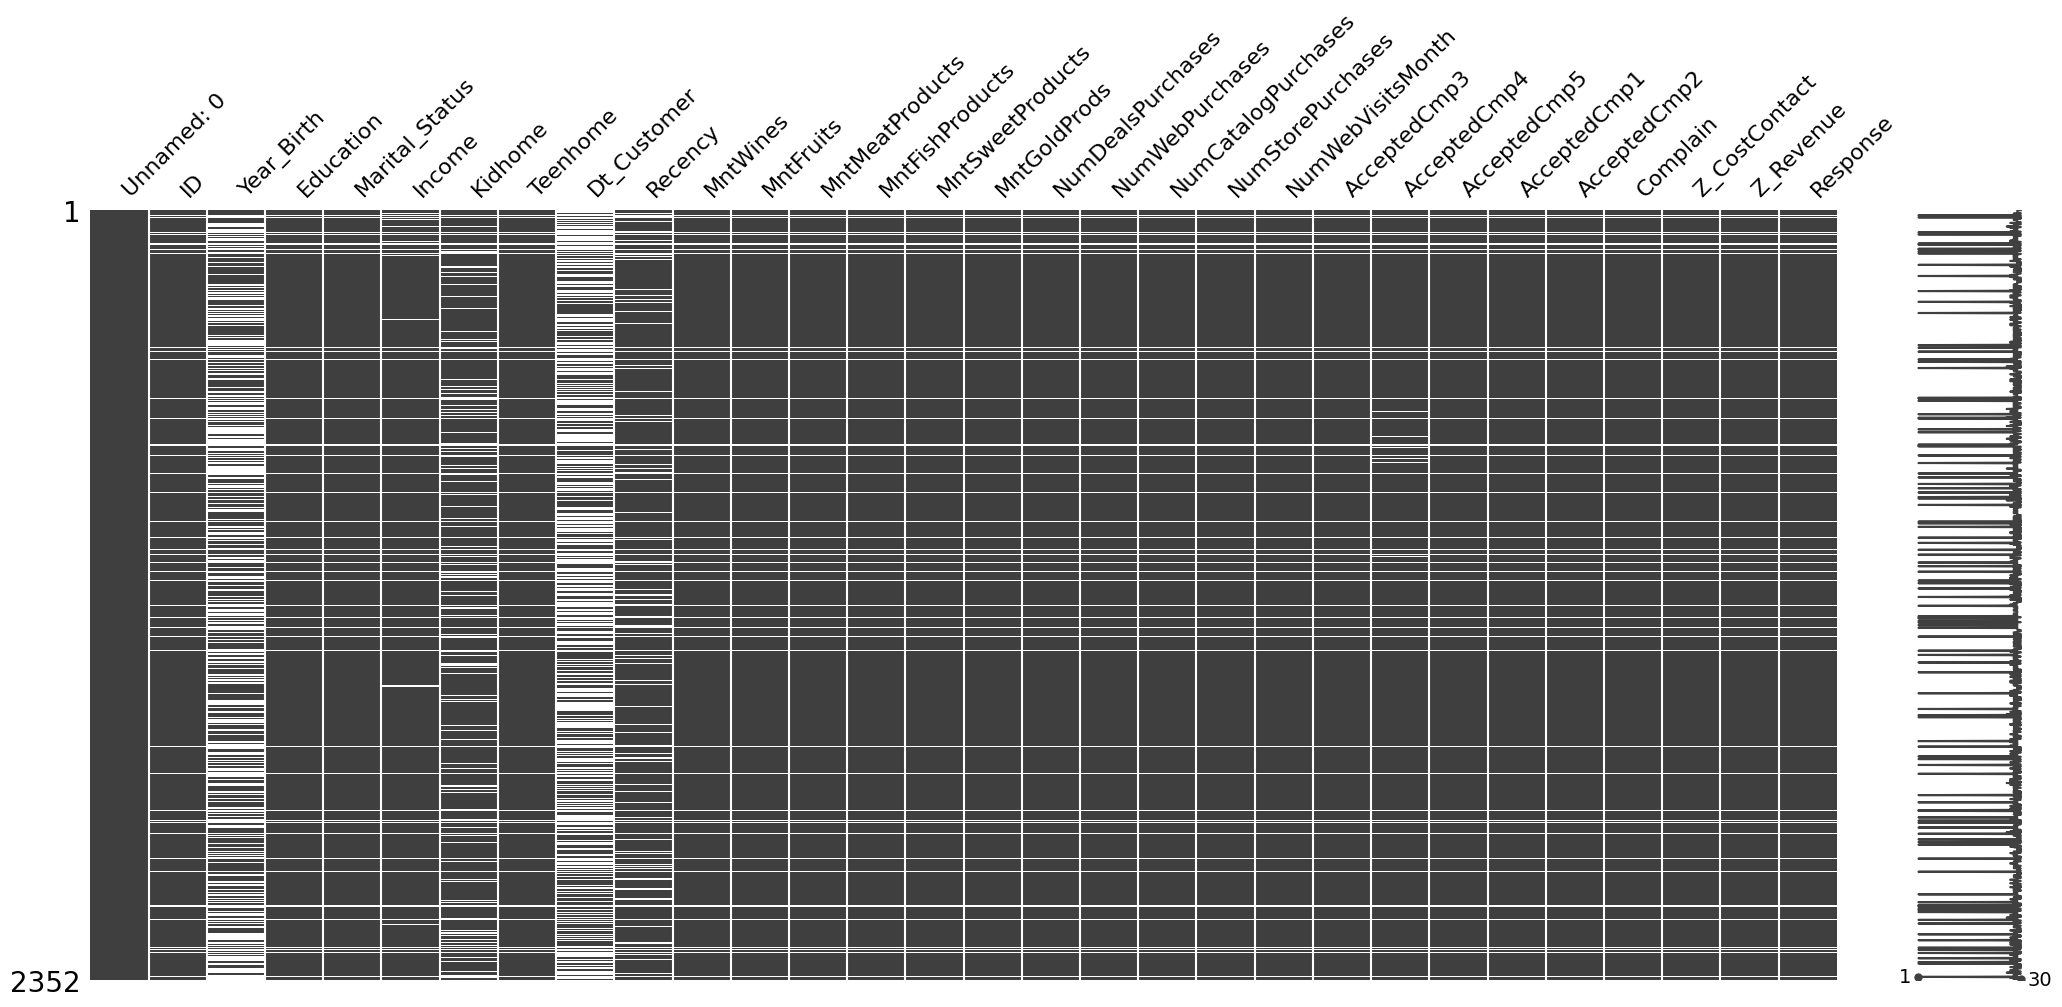

In [15]:
msno.matrix(dataset_marketing)

**PERCENTAGE**

In [16]:
dataset_marketing.isnull().sum(axis=0)/dataset_marketing.shape[0]

Unnamed: 0             0.000000
ID                     0.047619
Year_Birth             0.474065
Education              0.047619
Marital_Status         0.047619
Income                 0.057823
Kidhome                0.190476
Teenhome               0.047619
Dt_Customer            0.525510
Recency                0.142857
MntWines               0.047619
MntFruits              0.047619
MntMeatProducts        0.047619
MntFishProducts        0.047619
MntSweetProducts       0.047619
MntGoldProds           0.047619
NumDealsPurchases      0.047619
NumWebPurchases        0.047619
NumCatalogPurchases    0.047619
NumStorePurchases      0.047619
NumWebVisitsMonth      0.047619
AcceptedCmp3           0.047619
AcceptedCmp4           0.060374
AcceptedCmp5           0.047619
AcceptedCmp1           0.047619
AcceptedCmp2           0.047619
Complain               0.047619
Z_CostContact          0.047619
Z_Revenue              0.047619
Response               0.047619
dtype: float64

From the data above we get to know that the attributes that are the most problematic for missing values are:
- Year_Birth : 47.5% of missing values (1118 NaN)
- Dt_Customer: 52.2% of missing values (1228 NaN)

Since they have almost half of their values missing, they become meaningless and therefore eliminate the columns

On the other hand the amount of missing rows can be seen from the graph above. It is useless to sum the amount of missing values in a row, beacuse being the rows more than 2000 we wouldn't be able either way to check them.

## Eliminating the meaningless columns

Before applying the column transformer to the dataset, we have decided to eliminate the following columns:
- "Year_Birth" and "Dt_Customer" because they have too many missing values; 
- "Z_CostContact" and "Z_Revenue" because they always have the values 3 and 11,  respectively, so they are meaningless for the purpose of the project.
- "Complain" because there are almost all "0" as values, there are only very few exceptions where there is the value 1

In [17]:
dataset_marketing = dataset_marketing.drop(columns = ["Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Complain"])

To check that everything was done correctly we check that the columns are no longer present in our dataset:

In [18]:
dataset_marketing.columns

Index(['Unnamed: 0', 'ID', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response'],
      dtype='object')

## Eliminating the meaningless rows

We want to eliminate the completely empty rows

In [19]:
dataset_marketing = dataset_marketing.dropna(axis=0, how = "all", subset = ["ID"])
# We eliminate all the rows that only have missing values missing values
# We use the column "ID" because it was one of the columns that followed a pattern with the others
# Also because, otherwise no rows were eliminated because of "Unnamed: 0"

<Axes: >

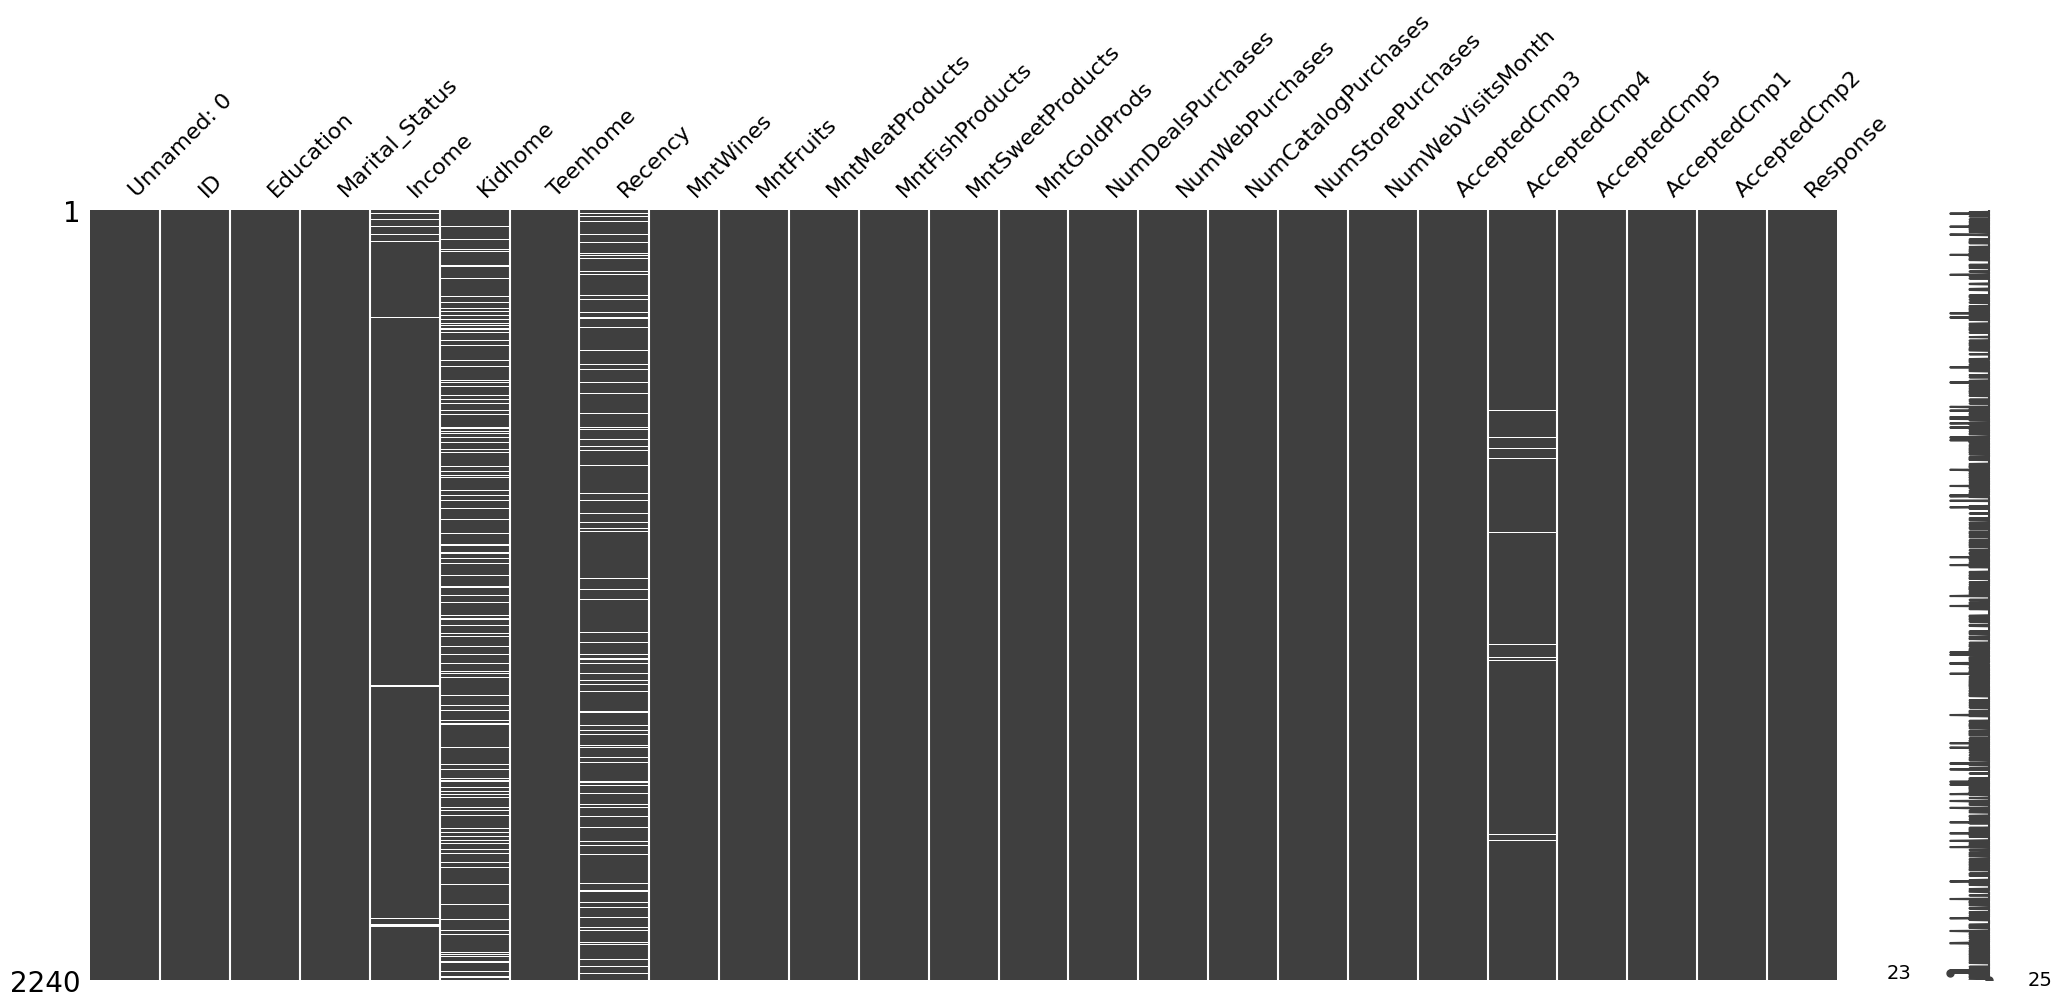

In [20]:
msno.matrix(dataset_marketing)

## Reducing the number of columns and possible values

We want to unite "Kidhome" and Teenhome into one column called haveChildren to know how many children the person has.

In [21]:
# For each row we sum the number of kids and the number of Teens
dataset_marketing["haveChildren"] = dataset_marketing[["Kidhome", "Teenhome"]].sum(axis = 1)
# And eliminate the columns in eccess
dataset_marketing = dataset_marketing.drop(columns = ["Kidhome", "Teenhome"])

Now, we want to change the values of Marital_Status into two values: "Single"  and "Partner"

In [22]:
# First we check the attributes in Marital Status
dataset_marketing["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
# Now that I have checked all the possible values of Marital_Status, it is possible to change the name of the values
dataset_marketing["Marital_Status"] = dataset_marketing["Marital_Status"].replace(
    {
        "Single":"Single",
        "Together":"Partner",
        "Married":"Partner",  
        "Divorced":"Single", 
        "Widow":"Single", 
        "Alone":"Single",
        "Absurd":"Single", 
        "YOLO":"Single"
    }
)

To simplify the values of the attribute Education, we will change the name of the values and divide them into "inSchool" and "Working"

In [24]:
# As before we check in first place all the possible values that this attribute can have
dataset_marketing["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [25]:
dataset_marketing["Education"] = dataset_marketing["Education"].replace(
    {
        "Graduation":"Working",
        "PhD":"Working",
        "Master":"Working",  
        "Basic":"inSchool", 
        "2n Cycle":"inSchool"
    }
)

## Renaming columns for clearness

Finally, we are renaming some columns to make them more understandable on what they represent.

In [26]:
dataset_marketing = dataset_marketing.rename(
    columns = {
        "MntWines": "SpendingWine",
        "MntFruits": "SpendingGreens",
        "MntMeatProducts": "SpendingMeat",
        "MntFishProducts": "SpendingFish",
        "MntSweetProducts": "SpendingSweets",
        "MntGoldProds": "SpendingGold"
    }
)

## Adding a column to have more data for our target

Afterwards, we want to sum the columns AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1 and AcceptedCmp2 to find how many campaigns were accepted in total to create more data that is relevant for the dataset.

In [27]:
# For each row I sum the number of accepted campaings
dataset_marketing["AcceptedCampaigns"] = dataset_marketing[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum(axis = 1)

## Final dataset to which we apply the Column Transformer

In [28]:
# Viewing the dataset
dataset_marketing

,Unnamed: 0,ID,Education,Marital_Status,Income,Recency,SpendingWine,SpendingGreens,SpendingMeat,SpendingFish,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,haveChildren,AcceptedCampaigns
0,0,5524.0,Working,Single,58138.0,58.0,635.0,88.0,546.0,172.0,...,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2174.0,Working,Single,46344.0,38.0,11.0,1.0,6.0,2.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2,4141.0,Working,Partner,71613.0,26.0,426.0,49.0,127.0,111.0,...,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6182.0,Working,Partner,26646.0,26.0,11.0,4.0,20.0,10.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,5324.0,Working,Partner,58293.0,94.0,173.0,43.0,118.0,46.0,...,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,2347,10870.0,Working,Partner,61223.0,46.0,709.0,43.0,182.0,42.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2348,2348,4001.0,Working,Partner,64014.0,56.0,406.0,0.0,30.0,0.0,...,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
2349,2349,7270.0,Working,Single,56981.0,91.0,908.0,48.0,217.0,32.0,...,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2350,2350,8235.0,Working,Partner,69245.0,8.0,428.0,30.0,214.0,80.0,...,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Name of the attributes
dataset_marketing.columns

Index(['Unnamed: 0', 'ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'SpendingWine', 'SpendingGreens', 'SpendingMeat', 'SpendingFish',
       'SpendingSweets', 'SpendingGold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'haveChildren',
       'AcceptedCampaigns'],
      dtype='object')

In [30]:
# Number of unique values for each attribute
dataset_marketing.nunique() 

Unnamed: 0             2240
ID                     2240
Education                 2
Marital_Status            2
Income                 1974
Recency                 100
SpendingWine            776
SpendingGreens          158
SpendingMeat            558
SpendingFish            182
SpendingSweets          177
SpendingGold            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
haveChildren              4
AcceptedCampaigns         5
dtype: int64

In [31]:
# Number of missing data for each attribute
dataset_marketing.isnull().sum(axis=0)

Unnamed: 0               0
ID                       0
Education                0
Marital_Status           0
Income                  24
Recency                224
SpendingWine             0
SpendingGreens           0
SpendingMeat             0
SpendingFish             0
SpendingSweets           0
SpendingGold             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4            30
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
haveChildren             0
AcceptedCampaigns        0
dtype: int64

In [32]:
# Distribution of data
dataset_marketing.describe()

,Unnamed: 0,ID,Income,Recency,SpendingWine,SpendingGreens,SpendingMeat,SpendingFish,SpendingSweets,SpendingGold,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,haveChildren,AcceptedCampaigns
count,2240.000000,2240.000000,2216.000000,2016.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2210.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1173.483482,5592.159821,52247.251354,48.850694,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.790179,5.316518,0.072768,0.074208,0.072768,0.064286,0.013393,0.149107,0.878125,0.296429
std,678.568711,3246.662198,25173.076661,28.946139,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,3.250958,2.426645,0.259813,0.262169,0.259813,0.245316,0.114976,0.356274,0.735657,0.676001
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,583.750000,2828.250000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1174.500000,5458.500000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1758.250000,8427.750000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2351.000000,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000


## Pipelines 

### Dealing with categorical data

For all the attributes we have first applied the <code>SimpleImputer</code> with strategy "most frequent", so it exchanges the nan values (missing data) with the most frequent value.
Since we are dealing with nominal categorical data, so categorical data without order, we use <code>OrdinalEncoder</code>. 
Finally we normalize the columns to have a better performance of classifiers using <code>MinMaxScaler</code>.

In [33]:
categoricalData = Pipeline(steps=[
    ('nan', SimpleImputer(strategy='most_frequent')),
    ('NominalFeatures', OrdinalEncoder()),
    ('norm', MinMaxScaler())
])

### Dealing with numerical data

**TO ONLY HAVE TWO VALUES: 0 OR 1**

For all the attributes we have first applied the <code>SimpleImputer</code> with strategy "most frequent", so it exchanges the nan values (missing data) with the most frequent value.
Since we are dealing with binary data (we only have two possible results: 0 or 1), we use <code>Binarizer(threshold=0.1)</code>, for which every data above 0 results having value 1. We do this to start balancing classes and have values that are still either 0 or 1.
In this case, we don't have to normalize the columns to have a better performance of classifiers, because the values are already normalized, since the mean is 0 and the variance is 1

In [34]:
numData_norm = Pipeline(steps=[
    ('nan', SimpleImputer(strategy='most_frequent'))
])

**TO GROUP DATA**

For all the attributes we have first applied the <code>SimpleImputer</code> with strategy "most frequent", so it exchanges the nan values (missing data) with the most frequent value.
Since we are dealing with continuos numerical data, we use <code>KBinsDiscretizer(n_bins=10, encode="ordinal")</code>, for which we "bin", so group, the continuos data into 10 possible values. Note that we have used <code>encode="ordinal"</code> to return the bin identifier encoded as an integer value.
Finally we normalize the columns to have a better performance of classifiers using <code>MinMaxScaler</code>.

In [35]:
num_data_group = Pipeline(steps=[
    ('nan', SimpleImputer(strategy='most_frequent')),
    ('NumFeatures', KBinsDiscretizer(n_bins=10, encode="ordinal")),
    ('norm', MinMaxScaler())
])

**TO ONLY NORMALIZE DATA**

For all the attributes we have first applied the <code>SimpleImputer</code> with strategy "mean", so it exchanges the nan values (missing data) with the mean value.
Since we are dealing with data that doesn't need much preprocessing we only normalize, as for the other attributes, to have a better performance of classifiers using <code>MinMaxScaler</code>.

In [36]:
num_data = Pipeline(steps=[
    ('nan', SimpleImputer(strategy='mean')),
    ('norm', MinMaxScaler())
])

## Column transformer

In [37]:
col_Transformer = ColumnTransformer (
    [
        ("categorical_data", categoricalData, ["Education", "Marital_Status"]),
        ("num_data_norm", numData_norm, ["AcceptedCmp1",
                                    "AcceptedCmp2",
                                    "AcceptedCmp3",
                                    "AcceptedCmp4",
                                    "AcceptedCmp5",
                                    "AcceptedCampaigns",
                                    "Response"]),
        ("num_data_group", num_data_group, ["Income",
                                            "Recency",
                                            "SpendingWine",
                                            "SpendingGreens",
                                            "SpendingMeat",
                                            "SpendingFish",
                                            "SpendingSweets",
                                            "SpendingGold"]),
        ("imputer", num_data, ["NumDealsPurchases",
                                "NumWebPurchases",
                                "NumCatalogPurchases",
                                "NumStorePurchases",
                                "NumWebVisitsMonth",
                                "haveChildren",
                                "ID"])
    ],
    verbose_feature_names_out = False
)

Now we fit the column classifier and create a dataFrame with the clean dataset obtained from applying the column transformer to the corrupted dataset.

In [38]:
col_Transformer.fit(dataset_marketing)
cleanData = pd.DataFrame(col_Transformer.transform(dataset_marketing), columns=col_Transformer.get_feature_names_out())

In [39]:
# To deal with imbalanced classes we add "dummy features"

imb_columns = ["AcceptedCmp1",
                "AcceptedCmp2",
                "AcceptedCmp3",
                "AcceptedCmp4",
                "AcceptedCmp5",
                "AcceptedCampaigns",
                "Education", 
                "Marital_Status"]

Data = pd.get_dummies(cleanData, columns=imb_columns)

In [40]:
Data

,Response,Income,Recency,SpendingWine,SpendingGreens,SpendingMeat,SpendingFish,SpendingSweets,SpendingGold,NumDealsPurchases,...,AcceptedCmp5_1.0,AcceptedCampaigns_0.0,AcceptedCampaigns_1.0,AcceptedCampaigns_2.0,AcceptedCampaigns_3.0,AcceptedCampaigns_4.0,Education_0.0,Education_1.0,Marital_Status_0.0,Marital_Status_1.0
0,1.0,0.555556,0.666667,0.888889,1.000,1.000000,1.000,0.875,0.888889,0.200000,...,False,True,False,False,False,False,True,False,False,True
1,0.0,0.444444,0.333333,0.111111,0.125,0.000000,0.125,0.125,0.222222,0.133333,...,False,True,False,False,False,False,True,False,False,True
2,0.0,0.777778,0.222222,0.777778,0.875,0.666667,0.875,0.625,0.666667,0.066667,...,False,True,False,False,False,False,True,False,True,False
3,0.0,0.111111,0.222222,0.111111,0.375,0.333333,0.375,0.250,0.111111,0.133333,...,False,True,False,False,False,False,True,False,True,False
4,0.0,0.666667,1.000000,0.444444,0.750,0.666667,0.750,0.750,0.333333,0.333333,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.666667,0.444444,0.888889,0.750,0.777778,0.750,1.000,1.000000,0.133333,...,False,True,False,False,False,False,True,False,True,False
2236,0.0,0.666667,0.666667,0.666667,0.000,0.333333,0.000,0.000,0.222222,0.466667,...,False,False,True,False,False,False,True,False,True,False
2237,0.0,0.555556,1.000000,1.000000,0.875,0.777778,0.625,0.500,0.555556,0.066667,...,False,False,True,False,False,False,True,False,False,True
2238,0.0,0.777778,0.000000,0.777778,0.750,0.777778,0.875,0.750,0.777778,0.133333,...,False,True,False,False,False,False,True,False,True,False


Now we check the absence of null values and if there are inconsistencies

In [41]:
Data.isnull().sum() # Checking there are no null values

Response                 0
Income                   0
Recency                  0
SpendingWine             0
SpendingGreens           0
SpendingMeat             0
SpendingFish             0
SpendingSweets           0
SpendingGold             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
haveChildren             0
ID                       0
AcceptedCmp1_0.0         0
AcceptedCmp1_1.0         0
AcceptedCmp2_0.0         0
AcceptedCmp2_1.0         0
AcceptedCmp3_0.0         0
AcceptedCmp3_1.0         0
AcceptedCmp4_0.0         0
AcceptedCmp4_1.0         0
AcceptedCmp5_0.0         0
AcceptedCmp5_1.0         0
AcceptedCampaigns_0.0    0
AcceptedCampaigns_1.0    0
AcceptedCampaigns_2.0    0
AcceptedCampaigns_3.0    0
AcceptedCampaigns_4.0    0
Education_0.0            0
Education_1.0            0
Marital_Status_0.0       0
Marital_Status_1.0       0
dtype: int64

In [42]:
Data.duplicated().sum() # Checking there are no inconsistencies

0

Now we save the Preprocessed dataset to be able to use in the notebook "Clustering", the second part of the project.

In [43]:
Data.to_csv("Marketing_data.csv")

# Splitting in training and test sets

## Define the target value

In [44]:
# Target value
y = Data["Response"]
print(y.shape)
# Data
X = Data.drop("Response", axis=1)
print(X.shape)

(2240,)
(2240, 34)


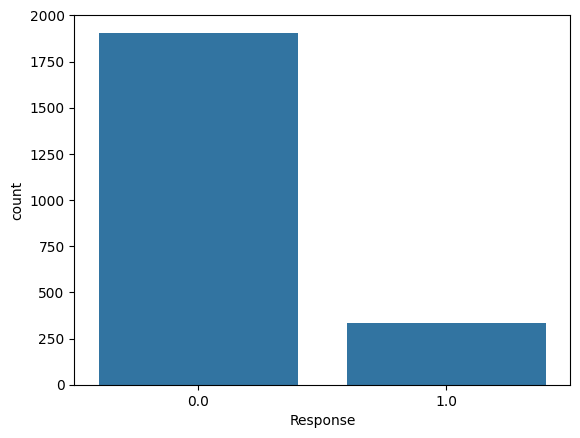

In [45]:
pd.Series(y).value_counts() 

Data["Response"].value_counts()

sns.countplot(x="Response", data=Data)
plt.show()

# Since the data is highly unbalanced, we will use f1 for evaluating the classifiers

## Split in train and test

Now we divide in train and test sets with
- 20% in the test set
- 80% in the train set

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)

# Model selection

In this section of the project we have to define the candidate models and select the ones with the best performance. This is done by using Nested cross-validation processes that combining hyper-parameter optimization and the metrics of evaluation of a classifiers allows us to find the best model.

Usually configurations are composed of:
- Feature preprocessing
- Dimensionality reduction: Feature selection or extraction
- Handling imbalanced classes
- Classifier

However, since we've already done feature preprocessing in the previous steps, it will not be added in our Pipeline used to cross-validate models

## Simple model pipeline

For example we can create a first simple pipeline:

In [47]:
test_pipeline = IMBPipeline([
    ('sampler', RandomUnderSampler()), # Dealing with unbalanced datasets: Unsampling
    ('dim_reduction', PCA(n_components=0.8)), # Dimensionality reduction
    ('classifier', LogisticRegression(C=1, penalty = "l2", solver = "lbfgs")) # Classifier
])

print("Pipeline steps:", test_pipeline.steps)

# Inspection of each component and its parameters
for name, estimator in test_pipeline.steps:
    print(f"Component: {name}")
    print("Parameters:", estimator.get_params())

Pipeline steps: [('sampler', RandomUnderSampler()), ('dim_reduction', PCA(n_components=0.8)), ('classifier', LogisticRegression(C=1))]
Component: sampler
Parameters: {'random_state': None, 'replacement': False, 'sampling_strategy': 'auto'}
Component: dim_reduction
Parameters: {'copy': True, 'iterated_power': 'auto', 'n_components': 0.8, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
Component: classifier
Parameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [48]:
# Now we fit the data so that after we can predict
test_pipeline.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', LogisticRegression(C=1))])

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87       381
         1.0       0.39      0.70      0.50        67

    accuracy                           0.79       448
   macro avg       0.66      0.75      0.68       448
weighted avg       0.86      0.79      0.81       448

Confusion Matrix:
[[306  75]
 [ 20  47]]


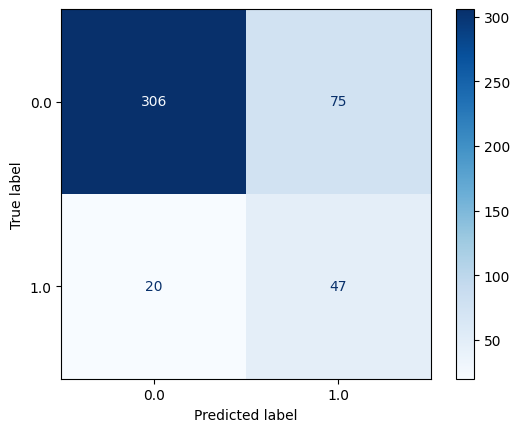

In [49]:
y_pred = test_pipeline.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
print("Confusion Matrix:")
print(conf_matrix)

## Nested Cross Validation

### Evaluating the Perceptron, KNN and Logistic Regression without the pipeline

In this case we won't apply any dimensionality reduction or methods to deal with imbalanced classes, we will only be working with the classifiers 

In [50]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2) # Makes sure there's a uniform distribution of minority classes in the split

def nested_random_search(
        X_train, y_train, X_test, y_test,
        estimators, param_grid_list,
        scoring='f1'):

    best_and_score = {}

    for i, e in enumerate(estimators):
        random_search = RandomizedSearchCV(e, param_grid_list[i], n_iter=10, scoring=scoring, verbose=2, cv=sss, n_jobs=-1)
        random_search.fit(X_train, y_train)

        best_est = random_search.best_params_
        print(f'Best parameters for {e} is: {best_est}')

        score = random_search.best_estimator_.score(X_test, y_test)
        best_and_score[f'{random_search.best_estimator_}'] = score

    max_key = max(best_and_score, key=best_and_score.get)
    return max_key, best_and_score[max_key]

In [58]:
best_C = [Perceptron(), KNeighborsClassifier(), LogisticRegression()]

param_grid = [
    {
        # PERCEPTRON
        'max_iter': [100, 200, 300],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01]
    },
    {
        # KNN
        'n_neighbors': np.arange(1, 15),
        'p': [1, 2, 3, 4],
        'weights': ['uniform', 'distance']
    }, 
    {
        # LOGISTIC REGRESSION
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l2'],
        'fit_intercept': [True, False],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

best = nested_random_search(X_train, y_train, X_test, y_test, estimators=best_C, param_grid_list=param_grid)

print(f'the best estimator is: {best}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............alpha=0.01, max_iter=300, penalty=l2; total time=   0.0s
[CV] END ...............alpha=0.01, max_iter=300, penalty=l2; total time=   0.0s
[CV] END ...............alpha=0.01, max_iter=300, penalty=l2; total time=   0.0s
[CV] END ...............alpha=0.01, max_iter=300, penalty=l2; total time=   0.0s
[CV] END ...............alpha=0.01, max_iter=300, penalty=l2; total time=   0.0s
[CV] END ..............alpha=0.001, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..............alpha=0.001, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..............alpha=0.001, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..............alpha=0.001, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..............alpha=0.001, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ..............alpha=0.001, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ..............alpha=0.001, max_iter=200

[CV] END ...............n_neighbors=6, p=4, weights=distance; total time=   0.5s
[CV] END ...............n_neighbors=6, p=4, weights=distance; total time=   0.5s
[CV] END ................n_neighbors=9, p=3, weights=uniform; total time=   0.4s
[CV] END ...............n_neighbors=6, p=4, weights=distance; total time=   0.4s
[CV] END ................n_neighbors=9, p=3, weights=uniform; total time=   0.4s
[CV] END ................n_neighbors=9, p=3, weights=uniform; total time=   0.4s
[CV] END ................n_neighbors=9, p=3, weights=uniform; total time=   0.4s
[CV] END ................n_neighbors=9, p=3, weights=uniform; total time=   0.4s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.4s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.4s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.4s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.3s
[CV] END ...............n_ne

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       381
         1.0       0.78      0.31      0.45        67

    accuracy                           0.88       448
   macro avg       0.83      0.65      0.69       448
weighted avg       0.87      0.88      0.86       448

Confusion Matrix:
[[375   6]
 [ 46  21]]
The f1 score for the train set is:  0.49878934624697335
The f1 score for the test set is:  0.44680851063829785


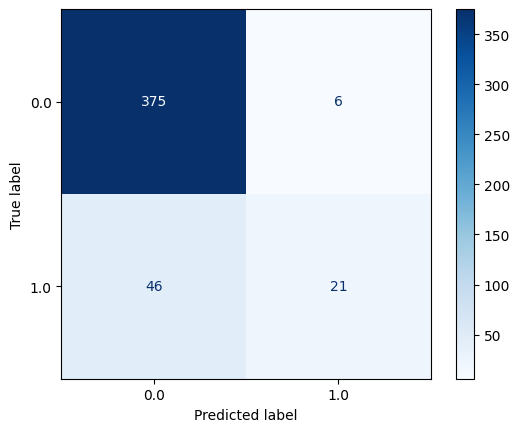

In [59]:
# Fitting the classifier
lr = LogisticRegression(C=1, fit_intercept=False)
lr.fit(X_train, y_train)
y_pred_logistic_test = lr.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic_test))

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_logistic_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic_test, cmap=plt.cm.Blues)
print("Confusion Matrix:")
print(conf_matrix_lr)

# Evaluating overfitting

y_pred_logistic_train = lr.predict(X_train)
# prediction test: y_pred_logistic_test

f1_train = f1_score(y_train, y_pred_logistic_train)
print("The f1 score for the train set is: ", f1_train)

f1_test = f1_score(y_test, y_pred_logistic_test)
print("The f1 score for the test set is: ", f1_test)

There is no overfitting, since the gap between the performance of the train set and the performance of the test set are close.

However, the f1 score is very low, which could be a sign of:
- Imbalanced classes, so the model is biased towards the majority class
- Either Recall or Precision are low (or both), since f1 is a "balance" of precision and recall - and since the precision or recall are low, I assume that the classifiers I used for my cross validation are not optimal for my data and they are making a lot of classification errors

### Evaluating Decision Tree, Random Forest and SVC with the pipeline

In [60]:
model_pipeline = IMBPipeline([
    ('sampler', SMOTE()), # Dealing with imbalanced datasets
    ('dim_reduction', PCA(n_components=0.8)), # Dimensionality reduction
    ('classifier', Perceptron()) # Classifier
])

In [61]:
# POSSIBLE HYPER-PARAMETER DISTRIBUTIONS:
# ----------------------------------------------------------------

# TO DEAL WITH IMBALANCED CLASSES
param_grid_imbalancedClasses = [
    {
        'sampler': [None]
    },
    {
        'sampler': [SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.6]
    },
    {
        'sampler': [RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 'auto', 1.2, 0.9, 0.6]
    },
    {
        'sampler': [RandomUnderSampler()],
        'sampler__sampling_strategy': ['minority', 1.2, 0.9, 0.6]
    }
]

# TO DEAL WITH DIMENSIONALITY REDUCTION
param_grid_dimReduction = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [SFS(estimator= LogisticRegression(), cv = None, scoring = 'f1')],
        'dim_reduction__k_features' : [5,7,10],
        'dim_reduction__forward' : [True, False]
    },
    {
        'dim_reduction' : [PCA()],
        'dim_reduction__n_components': [0.3, 0.5, 0.7, 0.9]
    },
    {
        'dim_reduction' : [LDA()],
        'dim_reduction__n_components': [0.3, 0.5, 0.7, 0.9]
    }
]

# CLASSIFIERS
param_grid_Classifiers = [
    {
        'classifier' : [RandomForestClassifier()], 
        'classifier__n_estimators': [np.arange(10, 200, 10)],
        'classifier__max_depth': [None] + [np.arange(1, 21)],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4, 6]
    },
    {
        'classifier' : [DecisionTreeClassifier()],
        'classifier__max_depth' : [np.arange(1, 21)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4, 6]
    },
    {
        'classifier' : [SVC()],
        'classifier__C' : [1, 2, 3, 4, 5],
        'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        'classifier__degree' : [1, 2, 3]
    }
]

In [62]:
all_configs = []

for configuration in itertools.product(param_grid_imbalancedClasses, param_grid_dimReduction, param_grid_Classifiers):
    all_parameters = []
    for element in configuration:
        for item in element.items():
            all_parameters.append(item)
    all_configs.append(dict(all_parameters)) 
    # by dict(all_parameters) we create a dict from a list of pairs (key:value)

f'Number of possible configurations: {len(all_configs)}'

'Number of possible configurations: 48'

In the last section with code we have build a list of possible configurations putting all the possible parameters together withing a list of dictionaries.
Each dictionary will contain a parameter of param_grid_imbalancedClasses, param_grid_dimReduction and param_grid_Classifiers 

The total amount of possible configurations is the Cartesian product on the lists defined above. In this case we have 4 possible ways to deal with unbalanced classes, 4 possible ways to deal with dimensionality reduction and 4 possible classifiers to apply to the dataset. Therefore 4x4x3 = 48, so 48 possible configurations.

In [63]:
# INNER LOOP: Optimization of the hyper-parameters

randomSearch = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=all_configs,
    n_iter=10,  # Specify the number of iterations
    cv=3,  # Specify the number of folds for cross-validation
    scoring='f1',  # Specify the scoring metric
    n_jobs=-1  # Use all available cores
)

In [64]:
# OUTER LOOP: Get the best estimator for each fold
scores = cross_validate(estimator=randomSearch, 
                        X=X_train, 
                        y=y_train, 
                        scoring='f1', 
                        cv=2, 
                        return_estimator=True, 
                        verbose=3, 
                        error_score='raise')

/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling

[CV] END ......................................., score=0.497 total time=   8.4s


/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/workspaces/UniversityProjects/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


[CV] END ......................................., score=0.521 total time=  49.1s


In [65]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index]) # Performance on the validation set
    print('-'*10)

RandomOverSampler()
SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          k_features=(10, 10), scoring='f1')
SVC(C=1, degree=1, kernel='linear') {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.49732620320855614
----------
RandomOverSampler()
SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          forward=False, k_features=(10, 10), scoring='f1')
SVC(C=5) {'C': 5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.5212121212121212
----------


F1 on training set:0.5407407407407407, F1 on test set:0.5151515151515151
F1 on training set:0.6079779917469051, F1 on test set:0.5614035087719298
classification report:               precision    recall  f1-score   support

         0.0       0.94      0.85      0.90       381
         1.0       0.46      0.72      0.56        67

    accuracy                           0.83       448
   macro avg       0.70      0.78      0.73       448
weighted avg       0.87      0.83      0.85       448

Confusion Matrix:
[[306  75]
 [ 20  47]]


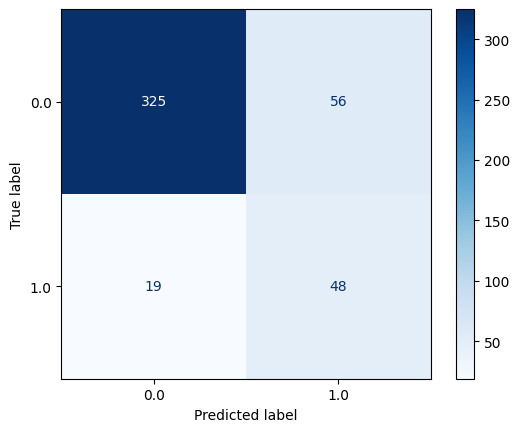

In [66]:
# EVALUATING OVERFITTING
for estimator in scores['estimator']:
    pred_fit = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

# Classification repor
classification_report = classification_report(y_test, pred_test)
print(f"classification report: {classification_report}")

# Confusion matrix
conf_matrix_svc = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, cmap=plt.cm.Blues)
print("Confusion Matrix:")
print(conf_matrix)

### Applying Ensemble Learning Classifiers  - we don't use cross validation here

Except Random Forest since it was already used previously and Voting because it is not efficient enough for the purpose of the project

In [69]:
# POSSIBLE CLASSIFIERS (the best of the previous sections)
clf1 = SVC(C=1, degree=2, kernel='sigmoid')
clf2 = Perceptron(penalty='l1', max_iter=100, alpha=0.01)
clf3 = KNeighborsClassifier(weights='uniform', p=4, n_neighbors=8)
clf4 = LogisticRegression(solver='liblinear', penalty='l2', fit_intercept=False, C=1)

pipe = IMBPipeline(
    [
        ['imb_class', RandomOverSampler(sampling_strategy=0.6)],
        ['dim_red', SFS(cv=None, estimator=LogisticRegression(),
                          forward=False, k_features=(5, 5), scoring='f1')],
        ['clf', clf1]
        
    ]
)

**BAGGING**

We will not be using the SVC because it needs the respective pipeline making the code below too computationally complex and thus making the run time extremely long (more than two hours)

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, classification_report

clf = [clf2, clf3, clf4]

for c, classifier in enumerate(clf):
    bag = BaggingClassifier(
        estimator=classifier, # Classifiers
        n_estimators=500, # 500 different classifiers
        max_samples=1.0, # sample size equal to sample training size
        max_features=1.0, # for bagging do not sample the features
        bootstrap=True, # bagging requires sampling with replacement - It could happen that some points are repeated into a specific realization of the training set of a specific classifier
        bootstrap_features=False, # No repetitions in a feature
        n_jobs=-1, 
    )

    bag = bag.fit(X_train, y_train)
    print(f'{classifier}')
    y_train_pred = bag.predict(X_train)
    y_test_pred = bag.predict(X_test)
    f1 = f1_score(y_test, y_test_pred)
    print(f'f1: {f1}')
    print("Classification Report:")
    classification_report_bag = classification_report(y_test, y_test_pred)
    print(classification_report_bag)

Perceptron(alpha=0.01, max_iter=100, penalty='l1')


precision: 0.1388888888888889
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       381
         1.0       1.00      0.07      0.14        67

    accuracy                           0.86       448
   macro avg       0.93      0.54      0.53       448
weighted avg       0.88      0.86      0.81       448

KNeighborsClassifier(n_neighbors=8, p=4)
precision: 0.5242718446601942
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       381
         1.0       0.75      0.40      0.52        67

    accuracy                           0.89       448
   macro avg       0.83      0.69      0.73       448
weighted avg       0.88      0.89      0.88       448

LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
precision: 0.4631578947368421
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89   

Evaluating Overfitting:
 f1 for the test: 0.4631578947368421 
 f1 for the train: 0.5024154589371981
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       381
         1.0       0.79      0.33      0.46        67

    accuracy                           0.89       448
   macro avg       0.84      0.66      0.70       448
weighted avg       0.88      0.89      0.87       448

Confusion Matrix:
[[375   6]
 [ 45  22]]


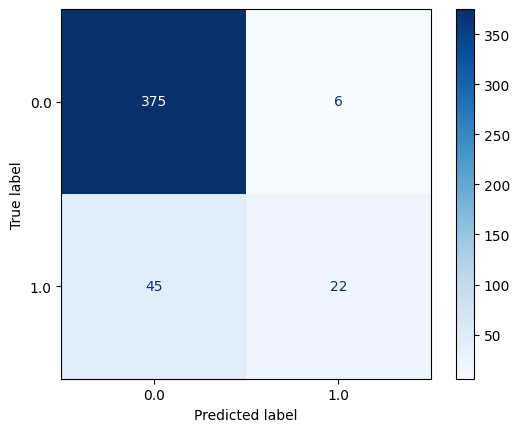

In [75]:
# Best classifier applied within bagging
bag = BaggingClassifier(
        estimator=LogisticRegression(solver='liblinear', fit_intercept=False, C=1),
        n_estimators=500,
        max_samples=1.0,
        max_features=1.0,
        bootstrap=True, 
        bootstrap_features=False, # No repetitions in a feature
        n_jobs=-1, 
    )

# Fitting the classifier
bag = bag.fit(X_train, y_train)

# Predictions
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

# EVALUATING OVERFITTING
f1_bag_test = f1_score(y_test, y_test_pred)
f1_bag_train = f1_score(y_train, y_train_pred)
print(f'Evaluating Overfitting:\n f1 for the test: {f1_bag_test} \n f1 for the train: {f1_bag_train}')

# CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print("Classification Report:")
classification_report_bag = classification_report(y_test, y_test_pred)
print(classification_report_bag)

#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
conf_matrix_bag = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap=plt.cm.Blues)
print("Confusion Matrix:")
print(conf_matrix_bag)


**ADABOOST**

In [77]:
clf = [clf2, clf4]

for c, classifier in enumerate(clf):
    ada = AdaBoostClassifier(
        estimator=classifier, # Classifiers
        learning_rate=0.5,
        algorithm = "SAMME"
    )

    ada = ada.fit(X_train, y_train)
    print(f'{classifier}')
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    f1 = f1_score(y_test, y_test_pred)
    print(f'precision: {f1}')
    print("Classification Report:")
    classification_report_ada = classification_report(y_test, y_test_pred)
    print(classification_report_ada)

Perceptron(alpha=0.01, max_iter=100, penalty='l1')
precision: 0.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       381
         1.0       0.00      0.00      0.00        67

    accuracy                           0.85       448
   macro avg       0.43      0.50      0.46       448
weighted avg       0.72      0.85      0.78       448



LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
precision: 0.5252525252525253
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       381
         1.0       0.81      0.39      0.53        67

    accuracy                           0.90       448
   macro avg       0.86      0.69      0.73       448
weighted avg       0.89      0.90      0.88       448



Evaluating Overfitting:
 f1 for the test: 0.5252525252525253 
 f1 for the train: 0.4855769230769231
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       381
         1.0       0.81      0.39      0.53        67

    accuracy                           0.90       448
   macro avg       0.86      0.69      0.73       448
weighted avg       0.89      0.90      0.88       448

Confusion Matrix:
[[375   6]
 [ 41  26]]


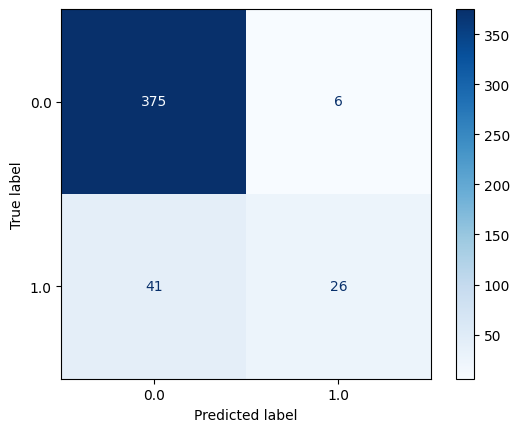

In [79]:
# Best classifier applied within adaboost
ada = AdaBoostClassifier(
        estimator=LogisticRegression(C=1, fit_intercept=False, solver='liblinear'),
        learning_rate=0.5,
        algorithm = "SAMME"
    )

# Fitting the classifier
ada = ada.fit(X_train, y_train)

# Predictions
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# EVALUATING OVERFITTING
f1_ada_test = f1_score(y_test, y_test_pred)
f1_ada_train = f1_score(y_train, y_train_pred)
print(f'Evaluating Overfitting:\n f1 for the test: {f1_ada_test} \n f1 for the train: {f1_ada_train}')

# CLASSIFICATION REPORT
print("Classification Report:")
classification_report_ada = classification_report(y_test, y_test_pred)
print(classification_report_ada)

#CONFUSION MATRIX
conf_matrix_ada = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap=plt.cm.Blues)
print("Confusion Matrix:")
print(conf_matrix_ada)

**XGB CLASSIFIER**

In [80]:
xgb = XGBClassifier(n_estimators = 500, # 500 estimators
                    learning_rate = 0.01, # Learning rate 0.01, but is not very efficient computational time
                    max_depth=4, # Limit on a max depth of the estimator, so automatically the class uses a decision tree
                    random_state=1)

Evaluating Overfitting:
 f1 for the test: 0.5050505050505051 
 f1 for the train: 0.7116279069767442
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       381
         1.0       0.78      0.37      0.51        67

    accuracy                           0.89       448
   macro avg       0.84      0.68      0.72       448
weighted avg       0.88      0.89      0.87       448

Confusion Matrix:
[[374   7]
 [ 42  25]]


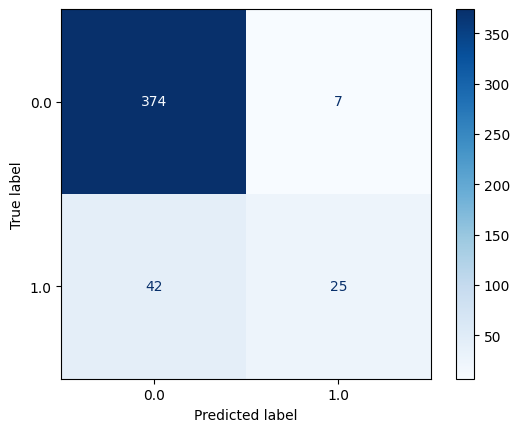

In [81]:
xgb.fit(X_train, y_train)
y_pred_xgb_test = xgb.predict(X_test)
y_pred_xgb_train = xgb.predict(X_train)

#EVALUATING OVERFITTING
f1_xgb_test = f1_score(y_test, y_pred_xgb_test)
f1_xgb_train = f1_score(y_train, y_pred_xgb_train)
print(f'Evaluating Overfitting:\n f1 for the test: {f1_xgb_test} \n f1 for the train: {f1_xgb_train}')

# CLASSIFICATION REPORT
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_test))

# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_test, cmap=plt.cm.Blues)
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Refinement of the selected model

## Find the best model

In [83]:
# BEST CLASSIFIERS found from the model selection done above
svc = SVC(C=1, degree=2, kernel='sigmoid')
log_re = LogisticRegression(solver='liblinear', penalty='l2', fit_intercept=False, C=1)
bag = BaggingClassifier(
        estimator=LogisticRegression(solver='liblinear', penalty='l2', fit_intercept=False, C=1),
        n_estimators=500,
        max_samples=1.0,
        max_features=1.0,
        bootstrap=True, 
        bootstrap_features=False, # No repetitions in a feature
        n_jobs=-1, 
    )
ada = AdaBoostClassifier(
        estimator=LogisticRegression(C=1, fit_intercept=False, solver='liblinear'),
        learning_rate=0.5,
        algorithm = "SAMME"
    )
xgb = XGBClassifier(n_estimators = 500, 
                    learning_rate = 0.01, 
                    max_depth=4,
                    random_state=1)

# Dimensionality reduction and Imbalanced classes for svc
pipe = IMBPipeline(
    [
        ['imb_class', RandomOverSampler(sampling_strategy=0.6)],
        ['dim_red', SFS(cv=None, estimator=LogisticRegression(),
                          forward=False, k_features=(5, 5), scoring='f1')],
        ['clf', svc]
        
    ]
)

# Checking the f1
clf_labels = ['Logistic Regression', 'Bagging', 'AdaBoost', 'XGBClassifier']
print('10-fold cross validation:\n')
for clf, label in zip([log_re, bag, ada, xgb], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=5, # changed to check that the code works, then change back to 10
                             scoring='f1')
    print(f'f1: {scores.mean():.2f}'
          f'(+/- {scores.std():.2f}) [{label}]')

# Evaluating the pipeline for svc
print('\nEvaluating the SVC:\n')
scores = cross_val_score(estimator=pipe,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         scoring='f1')
print(f'f1: {scores.mean():.2f}'
      f'(+/- {scores.std():.2f}) [Pipeline for svc]')

10-fold cross validation:

f1: 0.48(+/- 0.06) [Logistic Regression]
f1: 0.48(+/- 0.06) [Bagging]
f1: 0.49(+/- 0.05) [AdaBoost]
f1: 0.52(+/- 0.04) [XGBClassifier]

Evaluating the SVC:

f1: 0.26(+/- 0.07) [Pipeline for svc]


In [84]:
# COMPARING CLASSIFIERS

#Fitting the classifiers
pipe.fit(X_train, y_train)
log_re.fit(X_train, y_train)
bag.fit(X_train, y_train)
ada.fit(X_train, y_train)
xgb.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(10,4))
labels = ['SVC', 'Logistic Regression', 'Bagging', 'AdaBoost', 'XGBClassifier']
for i, clf in enumerate([pipe, log_re, bag, ada, xgb]):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    lab = labels[i]
    # Evaluating the models
    print(lab)
    f1_train = f1_score(y_train, clf.predict(X_train))
    f1_test = f1_score(y_test, y_predict)
    print(f'Evaluating Overfitting:\n f1 for the test: {f1_test} \n f1 for the train: {f1_train}')
    print('Checking other evaluation metrics:')
    print("Accuracy:", accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print("ROC AUC score:", roc_auc_score(y_test, y_predict))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_predict))
    print("Classification report:\n", classification_report(y_test, y_predict))
    print("\n")

SVC
Evaluating Overfitting:
 f1 for the test: 0.22429906542056074 
 f1 for the train: 0.25442477876106195
Checking other evaluation metrics:
Accuracy: 0.6294642857142857
Precision: 0.16326530612244897
ROC AUC score: 0.5176871547772945
Confusion matrix:
 [[258 123]
 [ 43  24]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.68      0.76       381
         1.0       0.16      0.36      0.22        67

    accuracy                           0.63       448
   macro avg       0.51      0.52      0.49       448
weighted avg       0.75      0.63      0.68       448



Logistic Regression
Evaluating Overfitting:
 f1 for the test: 0.4631578947368421 
 f1 for the train: 0.5
Checking other evaluation metrics:
Accuracy: 0.8861607142857143
Precision: 0.7857142857142857
ROC AUC score: 0.6563050887295805
Confusion matrix:
 [[375   6]
 [ 45  22]]
Classification report:
               precision    recall  f1-score   support

         0.0    

<Figure size 1000x400 with 0 Axes>

## Best model

From the evaluation done above we verified that the best model is AdaBoost, that is because it has:
- Good performance
- Low overfitting

In [95]:
best_model = AdaBoostClassifier(
        estimator=LogisticRegression(C=1, fit_intercept=False, solver='liblinear'),
        learning_rate=0.5,
        algorithm = "SAMME"
)

param_dist = {
    'estimator__C': uniform(loc=0.1, scale=10),
    'learning_rate': uniform(loc=0.1, scale=1),
}

rs_best = RandomizedSearchCV(
    estimator = best_model,
    param_distributions=param_dist,
    cv = KFold(n_splits=5),
    n_iter=100,
    scoring='f1'
)

In [96]:
# Check the best estimator
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                estimator=LogisticRegression(C=1,
                                                                             fit_intercept=False,
                                                                             solver='liblinear'),
                                                learning_rate=0.5),
                   n_iter=100,
                   param_distributions={'estimator__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f1e29f59b10>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f1e29f5a200>},
                   scoring='f1')

In [101]:
best_estimator = rs_best.best_estimator_

print(best_estimator)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=LogisticRegression(C=6.686356537832161,
                                                fit_intercept=False,
                                                solver='liblinear'),
                   learning_rate=0.43209389813891064)


In [98]:
# Evaluating overfitting

# Now we check the f1 score for he train and test sets:
forTest = best_estimator.predict(X_test)
forTrain = best_estimator.predict(X_train)

f1_train = f1_score(y_train, forTrain)
print("The f1 score for the train set is: ", f1_train)

f1_test = f1_score(y_test, forTest)
print("The f1 score for the test set is: ", f1_test)

The f1 score for the train set is:  0.48484848484848486
The f1 score for the test set is:  0.5


# Analysis of the sensitivity of the model

## Analyzing the learning curve

(11,)
(11,)


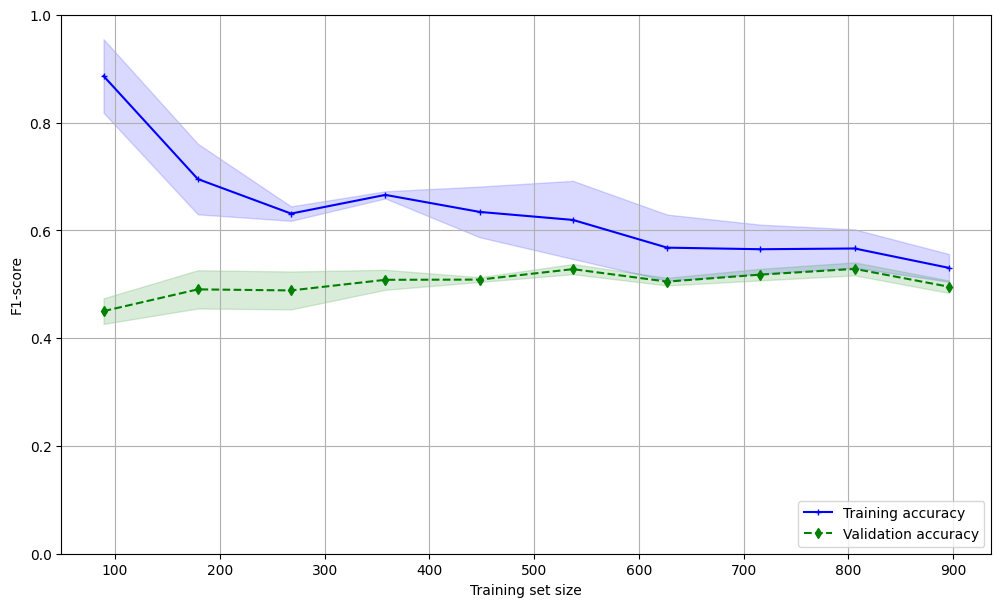

In [99]:
cls = best_estimator

train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X= X_train,
                                                       y= y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 2,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

# PLOT

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

train_sizes = train_sizes[:len(train_mean)]
print(train_sizes.shape)
print(train_mean.shape)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0, 1])
plt.show()

## Analyzing the validation curve

### For the parameter "C"

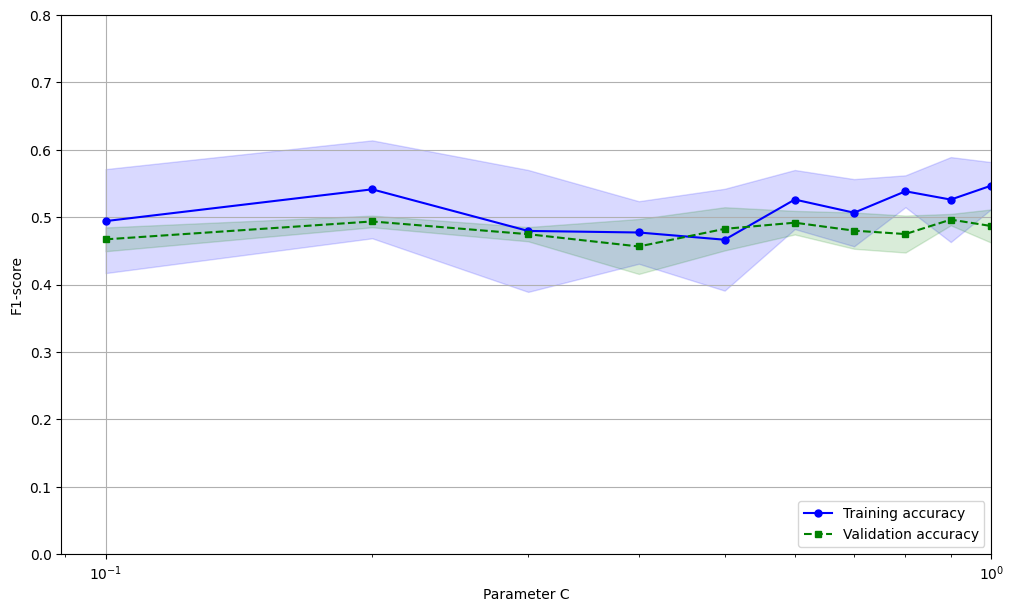

In [105]:
from sklearn.model_selection import validation_curve

range_alpha = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
train_scores, test_scores = validation_curve(
    cls,
    param_name='estimator__C',
    X=X_train, 
    y=y_train, 
    param_range= range_alpha, 
    cv=2, 
    n_jobs=-1, 
    scoring='f1'
)

# PLOT

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_alpha, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_alpha,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_alpha, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_alpha,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0, 0.8])
ax.set_xscale('log')
ax.set_xlim([0,1])
plt.show()

### For the parameter "learning_rate"

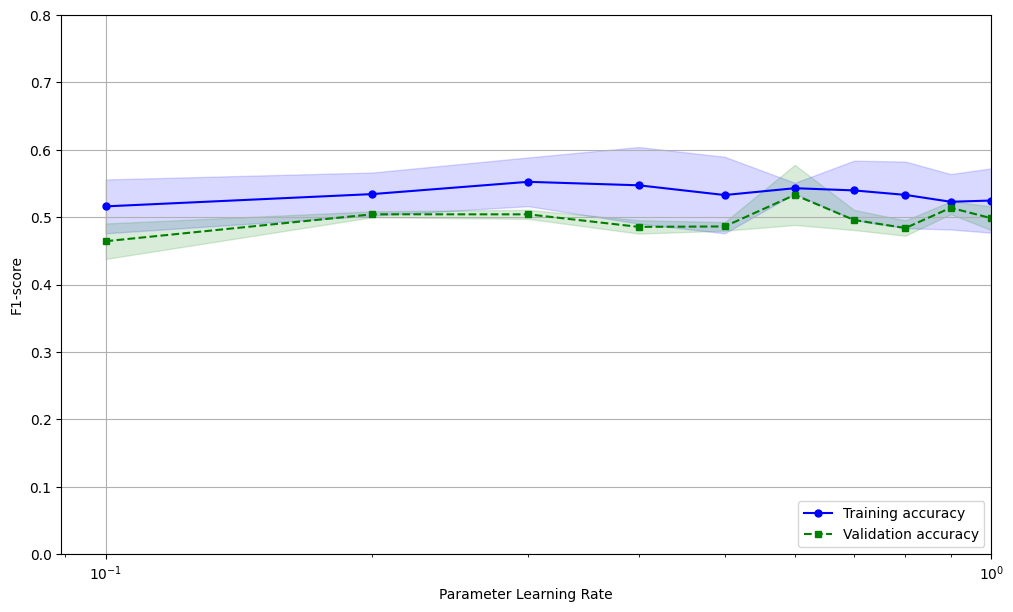

In [102]:
from sklearn.model_selection import validation_curve

range_alpha = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
train_scores, test_scores = validation_curve(
    cls,
    param_name='learning_rate',
    X=X_train, 
    y=y_train, 
    param_range= range_alpha, 
    cv=2, 
    n_jobs=-1, 
    scoring='f1'
)

# PLOT

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_alpha, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_alpha,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_alpha, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_alpha,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter Learning Rate')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0, 0.8])
ax.set_xscale('log')
ax.set_xlim([0,1])
plt.show()